<div align="center"> 
<img src='./img/header.png'/>
</div>

## [Global Ice Velocities](https://its-live.jpl.nasa.gov/)
    
The Inter-mission Time Series of Land Ice Velocity and Elevation (ITS_LIVE) project facilitates ice sheet, ice shelf and glacier research by providing a globally comprehensive and temporally dense multi-sensor record of land ice velocity and elevation with low latency.

Scene-pair velocities generated from satellite optical and radar imagery.

* Coverage: All land ice
* Date range: 1985-present
* Resolution: 240m
* Scene-pair separation: 6 to 546 days


---

* If you want to query our API directly using  your own software here is the OpenApi endpoint https://staging.nsidc.org/apps/itslive-search/docs
* For questions about this notebook and the dataset please contact users services at uso@nsidc.org


## Build a cube

This notebook demonstrates a prototype for the _ITSCube_ class to generate time series of velocity pair granules for the polygon of interest. 

For now ITSCube loads granules, as downloaded by the _itslive.ipynb_ notebook, from provided data directory. It uses centroid coordinates and offset in meters as parameters to ITSCube.create() method to define a polygon of interest. Centroid coordinates for the region are computed by the _itslive.ipynb_ notebook as well.

The following OpenApi parameters were used to download the granules:

> params = {'polygon': '-15.7356,81.2047,-15.7356,81.2067,-15.7336,81.2067,-15.7336,81.2047,-15.7356,81.2047', 'start': '2010-01-05', 'end': '2020-01-01', 'percent_valid_pixels': 1}

---

### ITSCube TODO
 * Polygon coordinates should be provided to the ITSCube class instance, which will interact with OpenApi to download granules for the polygon.
 * Should convert all granules to the most occuring projection for the cube (x, y, v (?))
 * Should handle multiple granules for the same "middle date": pick the granule which has data in the target projection

In [31]:
# Auto-reload all modules to pick up latest edits to dependent modules
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
%time
from itscube import ITSCube

cube = ITSCube(data_dir='cube_data')

# Hard-coded centroid to correspond to already downloaded data files in 'cube_data' dir
centroid = [-15.734577, 81.205687]

mean_offset_meters = 1200
cube.create(centroid, mean_offset_meters)
list(cube.velocities.keys())

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


[datetime.datetime(2013, 5, 16, 0, 0),
 datetime.datetime(2011, 7, 8, 0, 0),
 datetime.datetime(2013, 5, 8, 0, 0),
 datetime.datetime(2015, 2, 12, 0, 0),
 datetime.datetime(2017, 11, 15, 0, 0),
 datetime.datetime(2016, 12, 6, 0, 0),
 datetime.datetime(2011, 7, 7, 0, 0)]

In [84]:
cube.layers

<xarray.DataArray 'v' (mid_date: 7, y: 20, x: 20)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ..., 116., 123., 131.],
        [ nan,  nan,  nan, ..., 124., 131., 140.],
        [ nan,  nan,  nan, ..., 127., 135., 144.]],

       [[105.,  93.,  88., ...,  nan,  nan,  nan],
        [105.,  94.,  89., ...,  nan,  nan,  nan],
        [108.,  98.,  94., ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ 94.,  96.,  98., ...,  nan,  nan,  nan],
        [ 91.,  94.,  96., ...,  nan,  nan,  nan],
        [ 89.,  90.,  92., ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  

### Examine random cube layer

In [77]:
import datetime

# Examine one of the layers
first_date = list(cube.velocities.keys())[0]
first_layer = cube.velocities[first_date]
first_layer

<xarray.DataArray 'v' (y: 10, x: 10)>
array([[31., 26., 26., 28., 33., 39., 48., 57., 65., 72.],
       [30., 26., 25., 28., 32., 39., 48., 57., 65., 71.],
       [32., 28., 27., 30., 34., 41., 49., 57., 65., 71.],
       [35., 32., 32., 34., 38., 44., 52., 59., 66., 72.],
       [41., 38., 38., 40., 44., 49., 55., 62., 67., 72.],
       [46., 45., 45., 47., 51., 55., 60., 65., 69., 72.],
       [53., 52., 53., 54., 57., 61., 64., 66., 70., 72.],
       [58., 59., 60., 61., 63., 64., 67., 69., 70., 72.],
       [62., 63., 64., 65., 66., 67., 68., 69., 70., 71.],
       [64., 65., 67., 68., 68., 68., 69., 69., 70., 70.]], dtype=float32)
Coordinates:
  * x         (x) float64 4.864e+05 4.866e+05 4.868e+05 ... 4.883e+05 4.885e+05
  * y         (y) float64 9.017e+06 9.017e+06 9.017e+06 ... 9.015e+06 9.015e+06
    mid_date  datetime64[ns] 2013-05-16
Attributes:
    units:                m/y
    standard_name:        velocity
    map_scale_corrected:  0
    best_practice:        velocities s

In [78]:
first_layer.x

<xarray.DataArray 'x' (x: 10)>
array([486352.5, 486592.5, 486832.5, 487072.5, 487312.5, 487552.5, 487792.5,
       488032.5, 488272.5, 488512.5])
Coordinates:
  * x         (x) float64 4.864e+05 4.866e+05 4.868e+05 ... 4.883e+05 4.885e+05
    mid_date  datetime64[ns] 2013-05-16
Attributes:
    units:          m
    standard_name:  projection_x_coordinate
    long_name:      x coordinate of projection

In [92]:
first_layer.attrs

{'units': 'm/y',
 'standard_name': 'velocity',
 'map_scale_corrected': 0,
 'best_practice': 'velocities should always be merged/averaged using component velocities to prevent high velocity magnitude bias',
 'grid_mapping': 'UTM_Projection'}

### Display cube layers

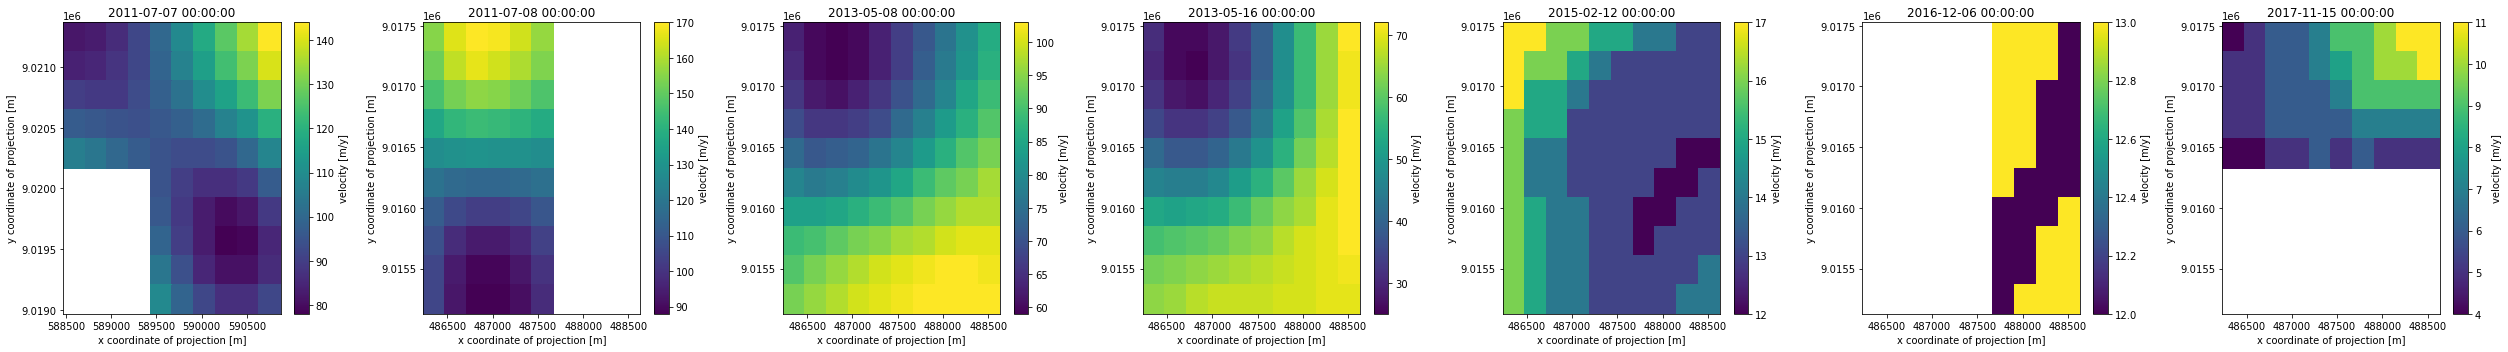

In [97]:
cube.plot_layers()

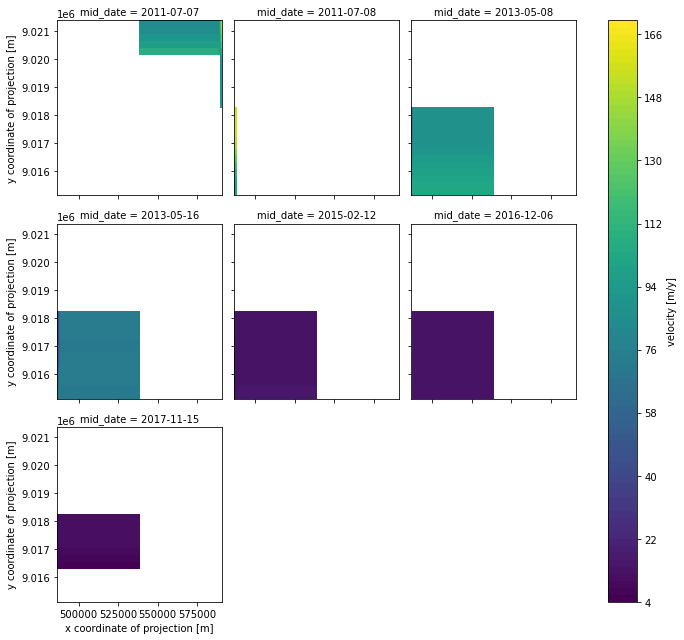

In [98]:
cube.plot()